# Practice Project - 4
Abalone Case Study

Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone.

# What is Abalone?

Abalone is a popular choice of seafood—a shellfish to be precise—that lives in cold coastal waters around the world. Biologically, abalone is a mollusk belonging to the Gastropoda class. In plain English, this means that abalone is technically a type of marine snail.

# importing libraries

In [1]:
# import necessary Libraries
import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

#feature engineering
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

#ML models
from sklearn import metrics
from sklearn.metrics import mean_squared_error ,r2_score


# data collection

In [2]:
#read the data
abalone = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### -Amongs feature columns data in column 'Sex' is categorical and Length, Diameter, Height, Whole Weight, Shucked Weight, Viscera Weight, Shell Weight columns data are in continuous. column 'Rings' data indicates that dependent variable data is discrete in nature.

In [3]:
#we give a alias name for abalone
ab1 = abalone.copy()

In [4]:
ab1.describe(include = ['int64','float64'])

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


- Though features are not normaly distributed, are close to normality
- Each feature has difference scale range
- None of the features have minimum = 0 except Height (requires re-check)

In [5]:
# check height ==0
(ab1.Height ==0).sum()

2

-Column Height has 2 zero values

In [6]:
ab1[ab1['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


number of missing values is 2 and is in the infant sex. 

We will fill in the missing value with the average Height feature for the immature gender

In [7]:
mean = pd.pivot_table(ab1,index=['Sex'],aggfunc={'Height':np.mean})
mean

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


-So we will fill in the missing value with 0.107996

In [8]:
ab1['Height'] = ab1['Height'].replace(to_replace=0,value =0.107996 )

In [9]:
ab1.isnull().sum(axis=0)

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

-  No missing values in the dataset
    -  All the features are numerical except "Sex" coloumn

# performing Exploratory Data Analysis

In [10]:
# Dimension of dataset

print(ab1.shape)

print("No. of rows : ", ab1.shape[0])
print("No. of columns : ", ab1.shape[1])

(4177, 9)
No. of rows :  4177
No. of columns :  9


In [11]:
# unique values
abalone.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [12]:
#check whether  duplicate values are present or not
ab1.duplicated().sum()

0

In [13]:
# Relationship between Dependent and Independent variables
x = ab1.drop(columns =["Rings"])
y = ab1['Rings']

In [14]:
# Analyzing the Target Variab1e
ab1['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [15]:
ab1['Rings'].nunique()

28

There are 28 ring count values in the label column

In [16]:
# Checking number of values in each 28 categories
ab1["Rings"].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

<AxesSubplot:xlabel='Rings', ylabel='count'>

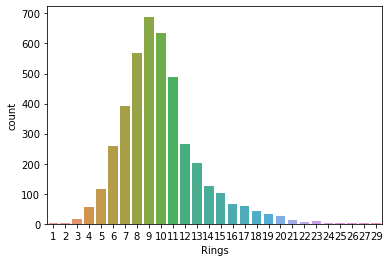

In [17]:
# # checking the same in Graph format
sns.countplot(ab1["Rings"])

-It is observed that the distribution is right skewed with the majority of values falling in the region between '5' to '13' and then the rest values tailing ooff from '14' to '29'

-The Data in target / label column is describe in nature since the count of "Rings" range 1 to 29 and the age of Abalone will be determined by adding 1.5 to number of rings.

In [18]:
ab1['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

['M' 'F' 'I']


<AxesSubplot:xlabel='Sex', ylabel='count'>

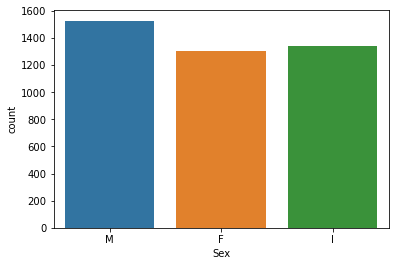

In [19]:
#distribution of categorical features
print(ab1['Sex'].unique())

sns.countplot(x = 'Sex', data = ab1)

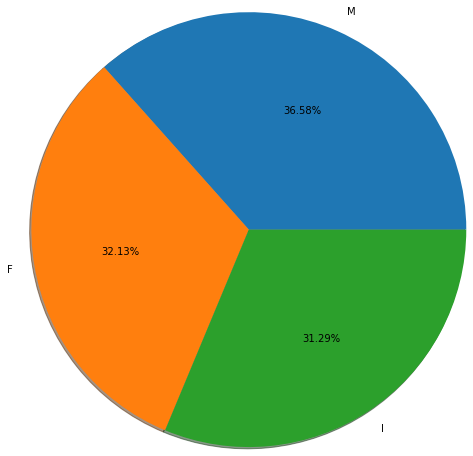

In [20]:
# Visualising with PIE chart
labels = 'M','F','I'
fig, ax = plt.subplots()
ax.pie(ab1['Sex'].value_counts(),labels = labels,radius = 2.5, autopct = '%1.2f%%', shadow = True)
plt.show()

# - We will convert Sex to numerical.
- Immature may have lower rings
            - M = 36.58%
            - F = 32.13%
            - I = 31.29%

In [21]:
#confirm our observations and our assumptions

ab1[['Sex', 'Rings']].groupby('Sex', as_index=False).mean().sort_values(by='Rings', ascending=False)

,Sex,Rings
0,F,11.129304
2,M,10.705497
1,I,7.890462


---Immature have lower rings and Female have maximum rings

# performing data visualization

<AxesSubplot:>

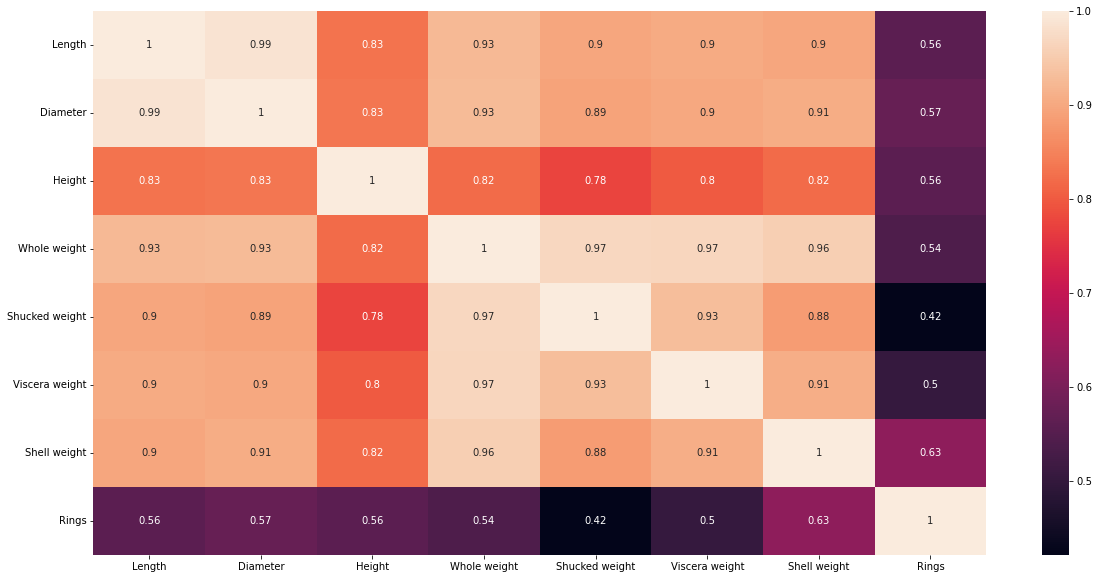

In [22]:
# corerelation between data using heatmap

plt.figure(figsize = (20,10))
sns.heatmap(ab1.corr(),annot = True)

The heat map shows that features are highly correlated and multicollinearity is possible.
 -Whole weight is almost linearly correlated with all the features except Rings
 Length is linearly correlated with Diameter
- From all the features excluding Rings, Height is least correlated with other features
 -Rings feature has the highest correlation with Shell Weight followed by Height, Length and Diameter


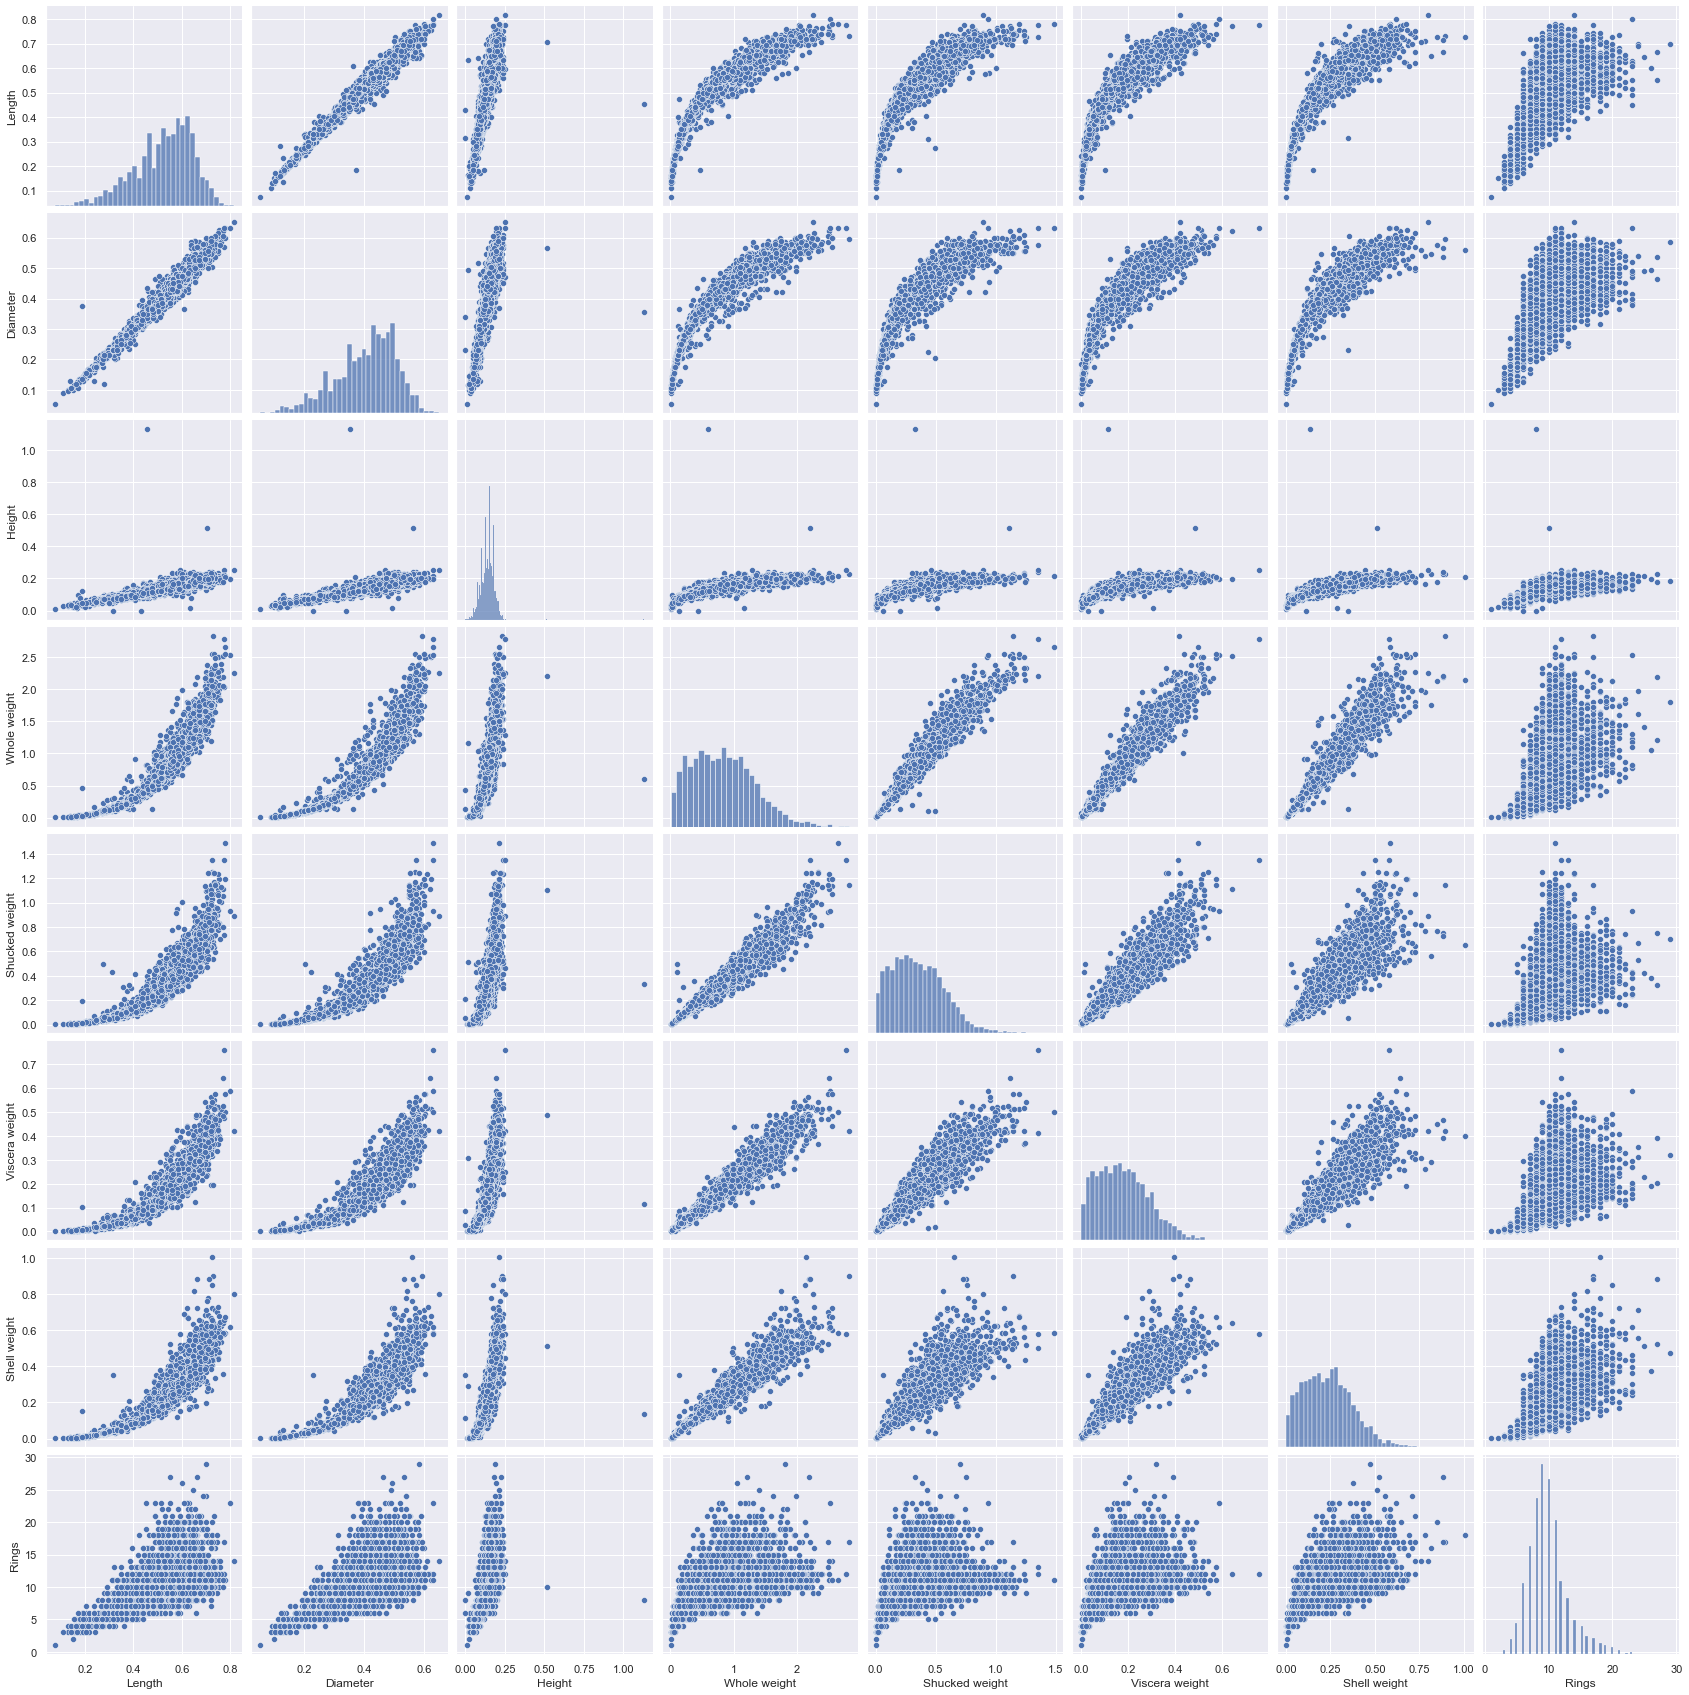

In [23]:
sns.set()
cols = ['Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight', 'Shell weight','Rings']
sns.pairplot(abalone[cols], height = 3)
plt.show();

Observations:

- Many features are highly correlated
- length and diameter show linear correlation
- the length and weight features are quadratic correlated
- whole weight is linearly correlated with other weight features
- Number of Rings is positively corelated with almost all quadratic features
- Possible outliers in Height features

Scatter plot analysis also shows that data mostly cover the values for Rings from 3 to little over 20, selecting only this data in the model may be taken under consideration to increase the accuracy.

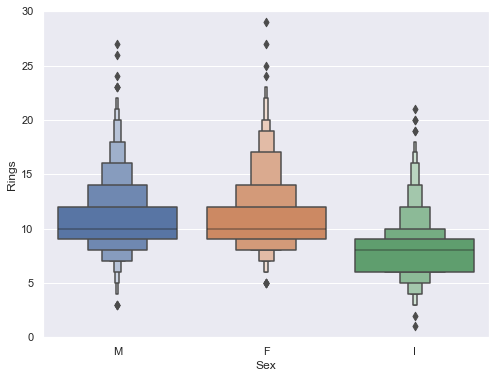

In [24]:
data = pd.concat([abalone['Rings'], abalone['Sex']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='Sex', y="Rings", data=abalone)
fig.axis(ymin=0, ymax=30);

In [25]:
#spliting data into target and features

x = ab1.drop(columns="Rings")
y = ab1['Rings']

# one hot encoding
x = pd.get_dummies(ab1)
x.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [26]:
x.shape

(4177, 11)

In [27]:
y.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

# skewness

In [28]:
# Dropping the values in categorical columns ('M','F','I') since their skewness can not be chaecked.
sk = x.drop(columns=['Sex_F', 'Sex_I', 'Sex_M'], axis = 1)
sk

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


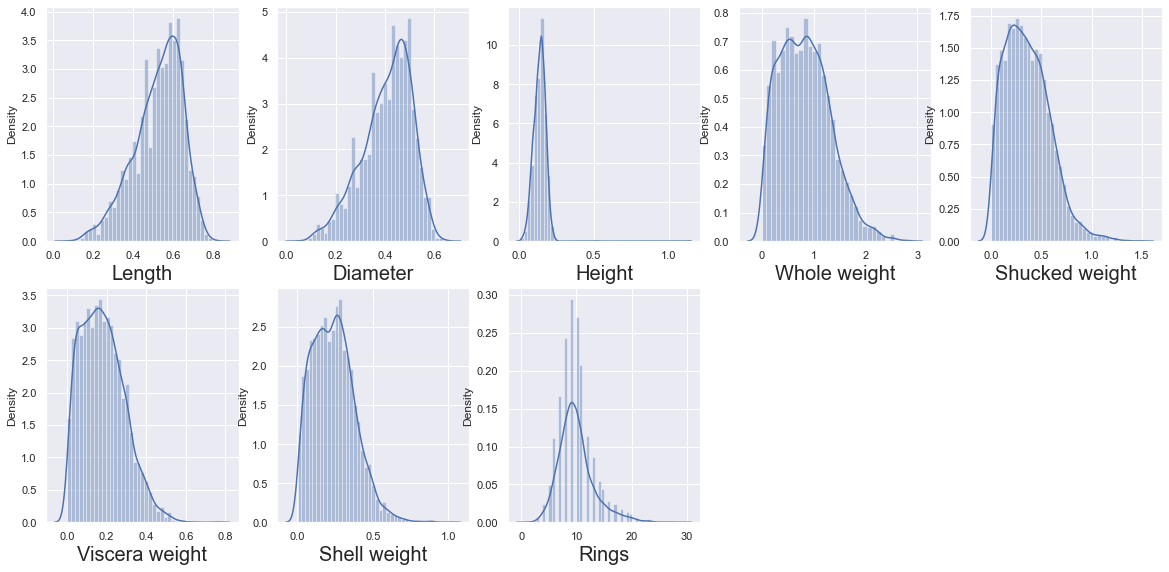

In [29]:
# Visualising data distribution for every column

plt.figure(figsize=(20,25))
plotnum=1

for col in sk:
    if plotnum<=10:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [30]:
sk.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.166698
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

- The Height column the data is highly skewed
- Length" and "Diameter" still skewed
- All the columns are not normallly distributed.

# Checking Outliers 

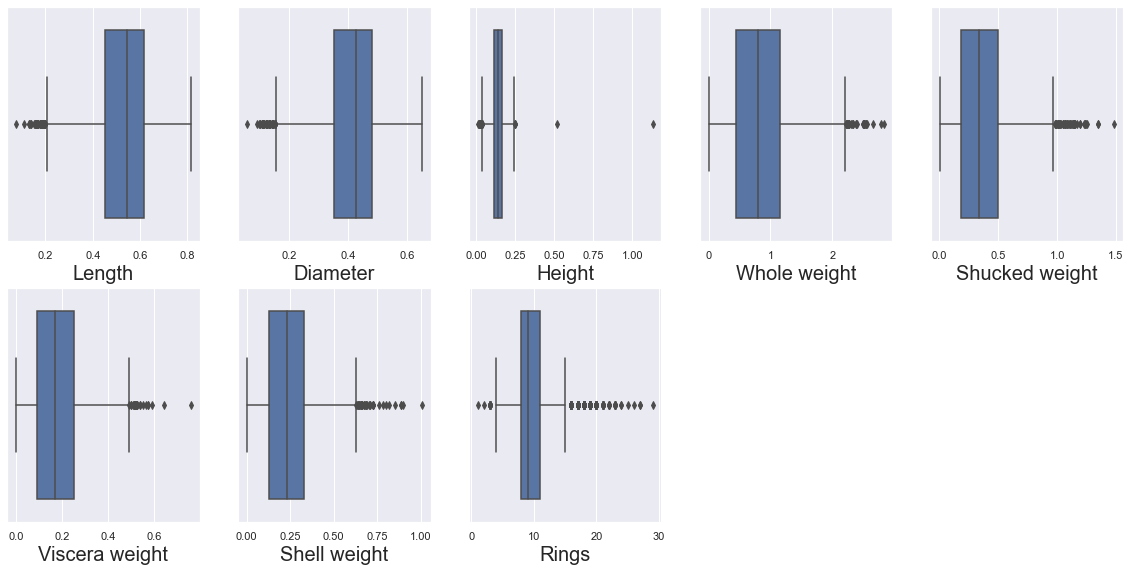

In [31]:
plt.figure(figsize=(20,25))
plotnum=1

for col in sk:
    if plotnum<=10:
        plt.subplot(5,5,plotnum)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

With the help of BoxPlot it is clearly indicating that all features have outliers present.

# Z score method to remove outliers

In [32]:
from scipy.stats import zscore
zscore = zscore(sk)
zabs = np.abs(zscore)

out = sk[(zabs<3).all(axis=1)] 

In [33]:
out.shape

(4029, 8)

In [34]:
sk.shape

(4177, 8)

In [35]:
# Data loss %

loss = (4177-4086)/4177*100
loss

2.178597079243476

(-2.17)% of data loss can be in acceptlable range

In [36]:
dropindex = x.index.difference(out.index)
dropindex

Int64Index([   6,   72,   81,   83,  129,  163,  164,  165,  166,  167,
            ...
            3837, 3899, 3902, 3924, 3930, 3944, 3961, 3962, 4145, 4148],
           dtype='int64', length=148)

In [37]:
sk.drop(dropindex,inplace = True)
sk

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


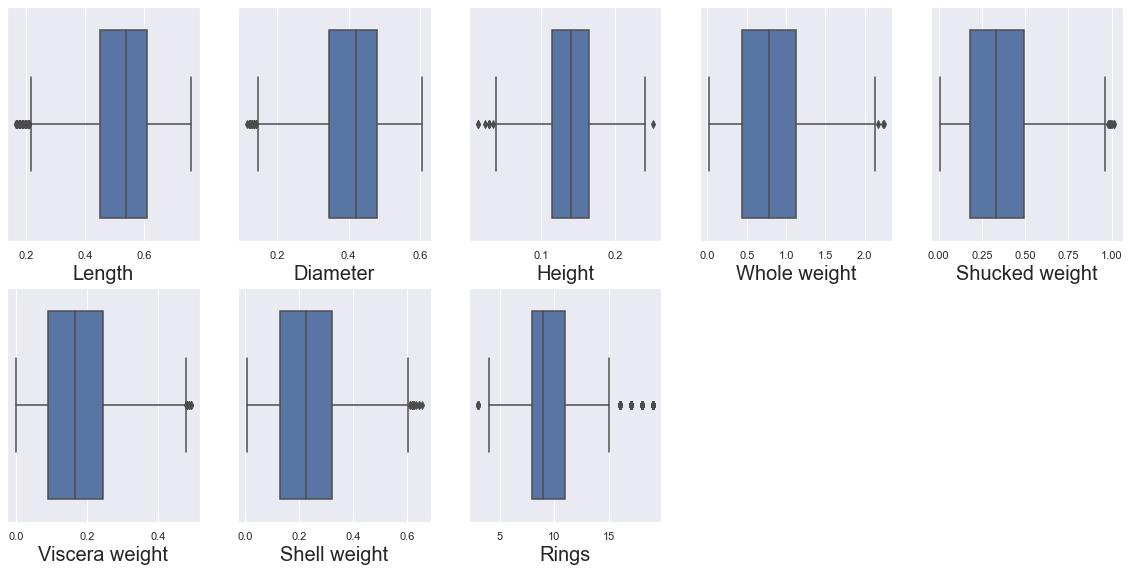

In [38]:
plt.figure(figsize=(20,25))
plotnum=1

for col in out:
    if plotnum<=10:
        plt.subplot(5,5,plotnum)
        sns.boxplot(out[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

 Some Outliers have been removed

# removable of skewness

In [39]:
out.skew()

Length           -0.621961
Diameter         -0.597677
Height           -0.243246
Whole weight      0.334719
Shucked weight    0.458771
Viscera weight    0.437599
Shell weight      0.349333
Rings             0.725901
dtype: float64

In [40]:
skew = ['Length','Diameter']

skewddf = out[skew].copy()

skewddf

,Length,Diameter
0,0.455,0.365
1,0.350,0.265
2,0.530,0.420
3,0.440,0.365
4,0.330,0.255
...,...,...
4172,0.565,0.450
4173,0.590,0.440
4174,0.600,0.475
4175,0.625,0.485


In [41]:
# Power Transformer

from sklearn.preprocessing import PowerTransformer
powertrns = PowerTransformer(method = 'yeo-johnson', standardize = True)
transformed = powertrns.fit_transform(skewddf)
transformed

array([[-0.6835812 , -0.54254271],
       [-1.41102074, -1.40042349],
       [-0.04541034,  0.03792235],
       ...,
       [ 0.65170897,  0.70646222],
       [ 0.92651374,  0.83819639],
       [ 1.97171906,  1.85540416]])

In [42]:
# check skewness
transformed = pd.DataFrame(transformed, columns = skewddf.columns) #this is to convert numpy array to dataframe
transformed.skew()

Length     -0.082999
Diameter   -0.080963
dtype: float64

In [43]:
out.reset_index(drop = True, inplace = True)
transformed.index = out.index
out[skew] = transformed[skew]
out

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.683581,-0.542543,0.095,0.5140,0.2245,0.1010,0.1500,15
1,-1.411021,-1.400423,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-0.045410,0.037922,0.135,0.6770,0.2565,0.1415,0.2100,9
3,-0.798788,-0.542543,0.125,0.5160,0.2155,0.1140,0.1550,10
4,-1.529910,-1.473662,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4024,0.290213,0.391080,0.165,0.8870,0.3700,0.2390,0.2490,11
4025,0.545706,0.270360,0.135,0.9660,0.4390,0.2145,0.2605,10
4026,0.651709,0.706462,0.205,1.1760,0.5255,0.2875,0.3080,9
4027,0.926514,0.838196,0.150,1.0945,0.5310,0.2610,0.2960,10


In [44]:
out.skew()

Length           -0.082999
Diameter         -0.080963
Height           -0.243246
Whole weight      0.334719
Shucked weight    0.458771
Viscera weight    0.437599
Shell weight      0.349333
Rings             0.725901
dtype: float64

# data standarization

In [45]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(out)
scaled_x

array([[-0.6835812 , -0.54254271, -1.16590127, ..., -0.72241757,
        -0.63069126,  1.8372675 ],
       [-1.41102074, -1.40042349, -1.30151111, ..., -1.23041555,
        -1.25608841, -0.95567718],
       [-0.04541034,  0.03792235, -0.08102253, ..., -0.33053341,
        -0.16164339, -0.25744101],
       ...,
       [ 0.65170897,  0.70646222,  1.81751525, ...,  1.08218478,
         0.60446812, -0.25744101],
       [ 0.92651374,  0.83819639,  0.32580699, ...,  0.82576675,
         0.51065855,  0.09167707],
       [ 1.97171906,  1.85540416,  1.54629556, ...,  1.94336231,
         2.06633396,  0.78991324]])

In [47]:
m = MinMaxScaler()
m_m_scaled_x = m.fit_transform(x)
m_m_scaled_x

array([[0.51351351, 0.5210084 , 0.07589286, ..., 0.        , 0.        ,
        1.        ],
       [0.37162162, 0.35294118, 0.07142857, ..., 0.        , 0.        ,
        1.        ],
       [0.61486486, 0.61344538, 0.11160714, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.70945946, 0.70588235, 0.17410714, ..., 0.        , 0.        ,
        1.        ],
       [0.74324324, 0.72268908, 0.125     , ..., 1.        , 0.        ,
        0.        ],
       [0.85810811, 0.84033613, 0.16517857, ..., 0.        , 0.        ,
        1.        ]])

In [48]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [49]:
# Adding value of 1.5 to every element of column "Rings" so that we get the age and adding new column age

age = y.add(1.5)
age

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Rings, Length: 4177, dtype: float64

In [50]:
from sklearn.feature_selection import SelectKBest, f_classif

bestfeat = SelectKBest (score_func = f_classif, k=10)

fit = bestfeat.fit(x,age)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

fit = bestfeat.fit(x,age)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()

featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10,'Score'))

          Feature       Score
7           Rings         inf
1        Diameter  196.436105
0          Length  188.509425
6    Shell weight  147.236946
2          Height  124.698676
3    Whole weight  113.712340
5  Viscera weight  103.721438
4  Shucked weight   80.797677
9           Sex_I   68.870477
8           Sex_F   15.783520


# model training

In [51]:
#ML models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, Ridge
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV, ShuffleSplit
from sklearn import feature_selection as fs
from scipy import stats

from xgboost import XGBRegressor

In [52]:
x_train,x_test,y_train,y_test = train_test_split(m_m_scaled_x,age,test_size = .31, random_state = 1)
lr = LinearRegression()
rf = RandomForestRegressor()
sv = SVR()
r = Ridge()

In [53]:
# Traing all the models
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
sv.fit(x_train,y_train)
r.fit(x_train,y_train)

Ridge()

In [54]:
# Linear Regression Model
y_lr_pred = lr.predict(x_test)

# Checking R2 Score

print(" R2 Score of Linear Regression : ", r2_score(y_test,y_lr_pred))

# Checking mean squared error

print(" Mean squared error of Linear Regression : ", mean_squared_error(y_test,y_lr_pred))

 R2 Score of Linear Regression :  1.0
 Mean squared error of Linear Regression :  1.110170957246032e-27


In [55]:
# Ridge Regression Model

y_r_pred = r.predict(x_test)

# Checking R2 score

print(" R2 Score of Ridge Regression : ",r2_score(y_test,y_r_pred))

# Checking mean squared error

print(" Mean Squarred error of Ridge Regression : ",mean_squared_error(y_test,y_r_pred))

 R2 Score of Ridge Regression :  0.9987772263325998
 Mean Squarred error of Ridge Regression :  0.01223214063515362


In [56]:
# Random Forest Regression Model

y_rf_pred = rf.predict(x_test)
# Checking R2 Score

print(" R2 Score of Random Forest Regression:", r2_score(y_test,y_rf_pred))

# checking mean squared error

print(" Mean Squarred error of Random Forest Regression:", mean_squared_error(y_test,y_rf_pred))

 R2 Score of Random Forest Regression: 0.9998847828095485
 Mean Squarred error of Random Forest Regression: 0.001152586872586875


In [57]:
# Support Vector Regression Model

y_sv_pred = sv.predict(x_test)

# Checking R2 Score

print(" R2 Score of SVM Regression:",r2_score(y_test,y_sv_pred))

# checking mean squared error

print(" Mean squared error of SVM Regression:",mean_squared_error (y_test,y_sv_pred))

 R2 Score of SVM Regression: 0.9953764926683322
 Mean squared error of SVM Regression: 0.046251725414460806




# cross validation

In [58]:
print("Linear Regression Model:",cross_val_score(lr,m_m_scaled_x,age,cv = ShuffleSplit(5)).mean())
print("Ridge Regression Model:",cross_val_score(r,m_m_scaled_x,age,cv = ShuffleSplit(5)).mean())
print("Random Forest Regression Model:",cross_val_score(rf,m_m_scaled_x,age,cv = ShuffleSplit(5)).mean())
print("SV Regression Model:",cross_val_score(sv,m_m_scaled_x,age,cv = ShuffleSplit(5)).mean())

Linear Regression Model: 1.0
Ridge Regression Model: 0.9992524244462555
Random Forest Regression Model: 0.9996933836392259
SV Regression Model: 0.997046449900021


above cross validation shows that linear regression show the best result

# HYPERPARAMETRE TUNING

# Random Forest Regression

In [59]:

parameter = {'n_estimators':[30,60],
             'max_depth':[10,20,40],
             'min_samples_leaf':[5,10,20],
             'min_samples_split':[5,10],
             'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]}
Gridcv = GridSearchCV(RandomForestRegressor(),parameter, cv=5,n_jobs = -1,verbose = 1)
Gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60]},
             verbose=1)

In [60]:
Gridcv.best_params_


{'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 30}

In [61]:
Best_mod = RandomForestRegressor(n_estimators = 60,criterion = 'mse',max_depth = 40,max_features = 'auto',min_samples_leaf = 10,min_samples_split = 10)
Best_mod.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=40, min_samples_leaf=10,
                      min_samples_split=10, n_estimators=60)

In [62]:
rf_pred = Best_mod.predict(x_test)
acc = r2_score(y_test,rf_pred)
print(acc*100)

99.94779819859694



- Random Forest Regressor model has an accuracy of 99.93%

In [64]:
import pickle

filename = 'Ablone.pkl'
pickle.dump(Best_mod,open(filename, 'wb'))